In [ ]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from sklearn.covariance import GraphicalLasso
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
df=pd.read_pickle("./cleanData_model.pkl")

# Exploring Variable Correlation

<AxesSubplot:>

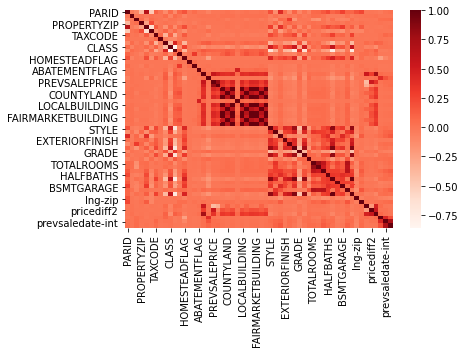

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)

In [ ]:
#Correlation with output variable
cor_target = abs(cor["SALEPRICE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

OWNERCODE             0.125635
CLASS                 0.152973
USECODE               0.158406
SALEPRICE             1.000000
PREVSALEPRICE         0.578249
PREVSALEPRICE2        0.473398
COUNTYBUILDING        0.393963
COUNTYLAND            0.370453
COUNTYTOTAL           0.414262
LOCALBUILDING         0.397362
LOCALLAND             0.370433
LOCALTOTAL            0.417043
FAIRMARKETBUILDING    0.398319
FAIRMARKETLAND        0.371353
FAIRMARKETTOTAL       0.418034
pricediff             0.528055
pricediff2            0.301185
pricediffmax          0.758721
Name: SALEPRICE, dtype: float64

# PCA

In [ ]:
vals=[
    'lng-zip',
    'lat-zip',
    'LOTAREA',
    'saledate-int',
    'prevsaledate-int',
    'prevsaledate2-int',
    'PREVSALEPRICE',
    'PREVSALEPRICE2',
    'FINISHEDLIVINGAREA',
    'STORIES',
    'YEARBLT',
    'CARDNUMBER',
    'BSMTGARAGE',
    'FIREPLACES',
    'HALFBATHS',
    'FULLBATHS',
    'TOTALROOMS',
    'SALEPRICE',
    'SCHOOLCODE',
    'TAXCODE',
    'TAXSUBCODE',
    'OWNERCODE',
    'CLASS',
    'ROOF',
    'BASEMENT',
    'LOCALLAND',
    'FAIRMARKETBUILDING',
    'FAIRMARKETLAND',
    'STYLE',
    'ROOF',
    'BASEMENT',
    'GRADE',
    'CONDITION',
    'HEATINGCOOLING',
    'PARID',
    'MUNICODE',
    'USECODE',
    'HOMESTEADFLAG',
    'FARMSTEADFLAG',
    'CLEANGREEN',
    'ABATEMENTFLAG',
    'SALECODE',
    'COUNTYBUILDING',
    'COUNTYLAND',
    'EXTERIORFINISH',
    'CDU'
    ]

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[vals])
X_scaled = scaler.transform(df[vals])


from sklearn.decomposition import PCA
pca=PCA(n_components=4)
transform=pca.fit_transform(X_scaled)

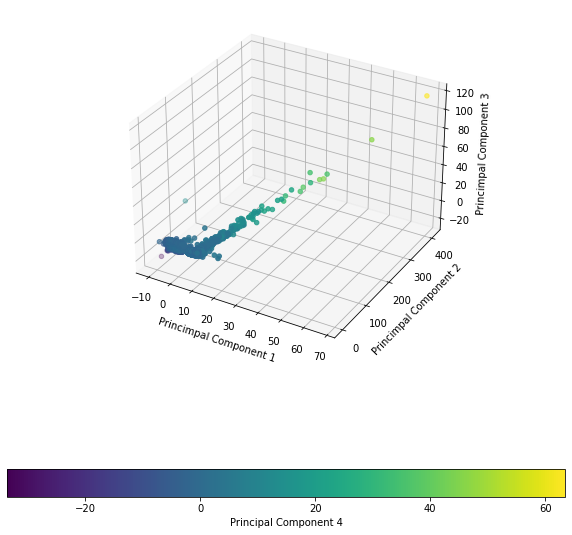

In [ ]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plot=ax.scatter(transform[:,0],transform[:,1],transform[:,2],c=transform[:,3])
cbar=fig.colorbar(plot,orientation="horizontal", pad=0.2)
cbar.set_label('Principal Component 4')

ax.set_xlabel('Princimpal Component 1')
ax.set_ylabel('Princimpal Component 2')
ax.set_zlabel('Princimpal Component 3');

# Exploring Effects of Different Features on Sale Price

## Sale Price as time series

In [ ]:
#CHECKIGN THE MEAN SALEPRICE OF THE DATASET
print(df['SALEPRICE'].mean())

194604.2940126056


In [ ]:
#REMOVING OUTLIERS FOR GRAPHICAL PURPOSES
df2=df[(np.abs(stats.zscore(df['SALEPRICE'])) < 3)]
#CHECKIGN THE MEAN SALEPRICE OF THE DATASET
print(df2['SALEPRICE'].mean())


151848.02343633934


In [ ]:
#CREATE A MOVING AVERAGE OF 10 DAYS FOR PRICING
df2=df2.set_index('SALEDATE').groupby(pd.Grouper(freq='10D')).mean()
df2=df2.dropna(subset=['SALEPRICE'])

<AxesSubplot:xlabel='SALEDATE'>

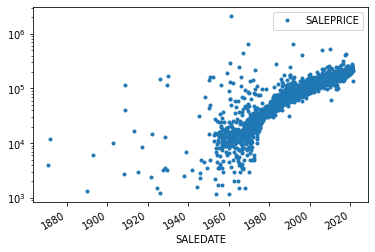

In [ ]:
df2.plot(y='SALEPRICE',use_index=True,ls='',marker='.',logy=True)

In [ ]:
# FITTING AN EXP CURVE TO THE DATA
opt=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  df2['saledate-int'], df2['SALEPRICE'] ,p0=(0, 0))
opt

(array([3.61791954e+04, 1.00193506e-04]),
 array([[ 1.85289309e+06, -3.34642835e-03],
        [-3.34642835e-03,  6.61378781e-12]]))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


(653.5823647260368, 600000.0)

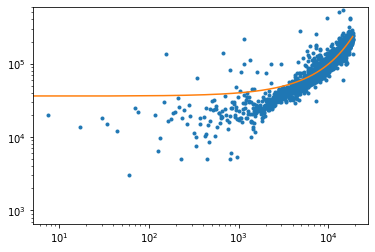

In [ ]:
# PLOTTING THE EXP CURVE ON THE DATA IN LOG SPACE
plt.semilogy(df2['saledate-int'], df2['SALEPRICE'],'.')
xx=np.linspace(min(df2['saledate-int']),max(df2['saledate-int']),1000)
yy=opt[0][0]*np.exp(opt[0][1]*xx)
plt.semilogx(xx,yy)


(0.0, 600000.0)

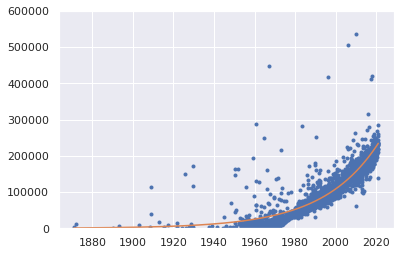

In [ ]:
# PLOTTING THE EXP CURVE ON THE DATA IN LINEAR SPACE
plt.plot(df2.index, df2['SALEPRICE'],'.')
plt.plot(xx,yy)
plt.ylim([0,6E5])

## Exploring other features

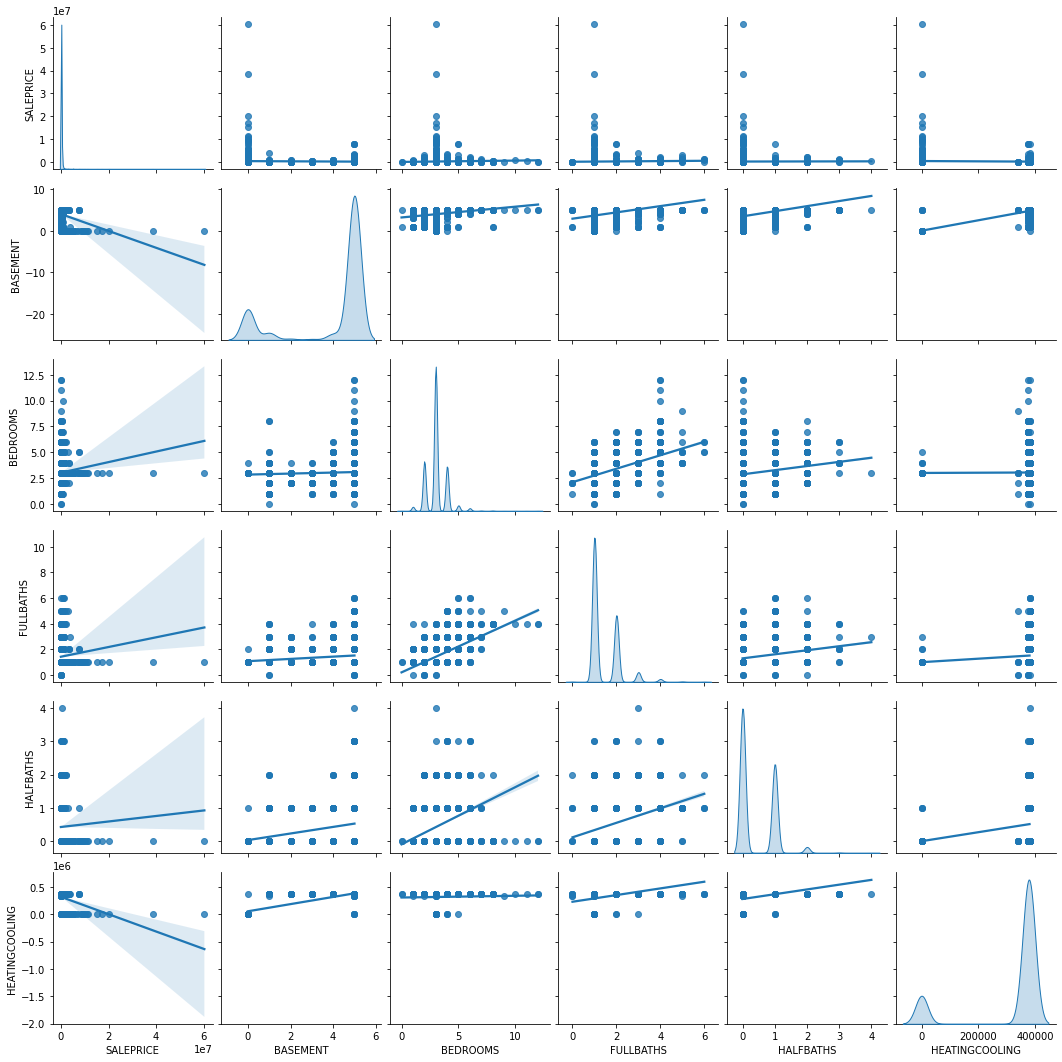

In [ ]:
sns.pairplot(df.sample(10000,random_state=10), 
    vars=['SALEPRICE','BASEMENT','BEDROOMS','FULLBATHS','HALFBATHS','HEATINGCOOLING'],
    kind='reg', diag_kind='kde')

## How does house amanitites affect sale price

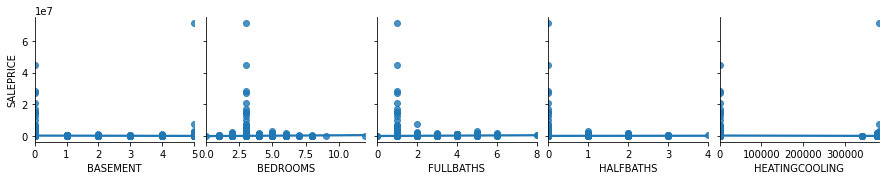

In [ ]:
sns.pairplot(df.sample(10000), 
    y_vars=['SALEPRICE'],
    x_vars=['BASEMENT','BEDROOMS','FULLBATHS','HALFBATHS','HEATINGCOOLING'],
    kind='reg', diag_kind='kde')

## How does the fair market assessments affect sale price

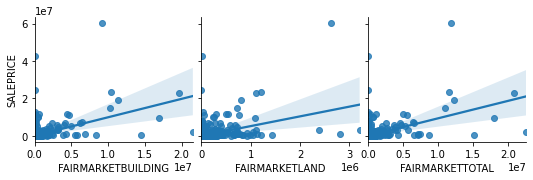

In [ ]:
sns.pairplot(df.sample(10000), 
    y_vars=['SALEPRICE'],
    x_vars=['FAIRMARKETBUILDING','FAIRMARKETLAND','FAIRMARKETTOTAL'],
    kind='reg', diag_kind='kde')

## How does zip-code based locations affect sale price

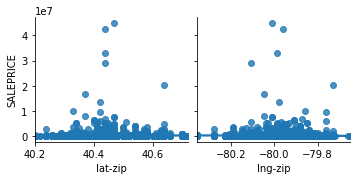

In [ ]:
sns.pairplot(df.sample(10000), 
    y_vars=['SALEPRICE'],
    x_vars=['lat-zip','lng-zip'],
    kind='reg', diag_kind='kde')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

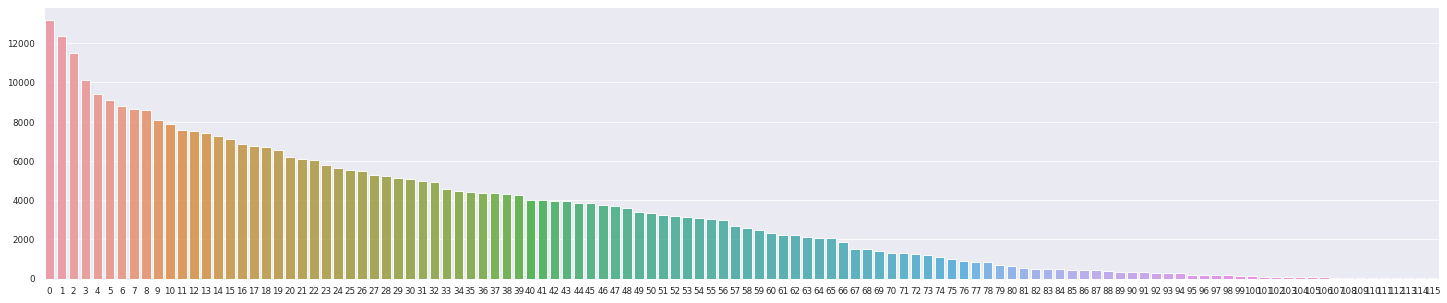

In [ ]:
# WHAT IS THE DISTRIBUTION OF PROPERTIES THROUGH THE ZIPCODE SPECTRUM

sns.set_context('paper')

count = df['PROPERTYZIP'].value_counts()
f, ax = plt.subplots(figsize = (25,5))
sns.set(style="darkgrid")
sns.barplot(np.arange(len(count.index)), count.values, alpha=0.9)

In [ ]:
count

15237.0    13195
15108.0    12371
15235.0    11500
15212.0    10138
15221.0     9421
           ...  
15083.0       19
15321.0       18
15012.0       12
16229.0       12
16056.0        2
Name: PROPERTYZIP, Length: 116, dtype: int64

# Geo Exploration

## Exploring Address Level Granularity of Geolocation

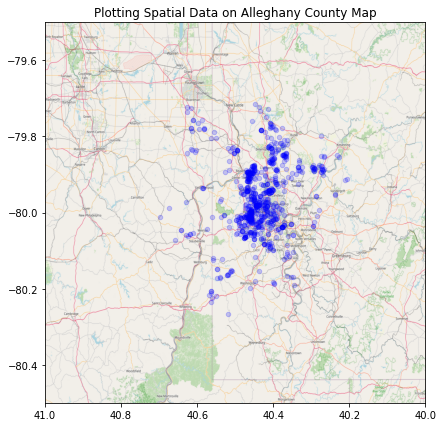

In [ ]:
df=pd.read_pickle("./cleanData_geocode1.pkl")

mapi=plt.imread('map.png')
BBox = ((41,   40,      
         -80.5, -79.5))


latlong=np.array([[i[0],i[1]] for i in df['location'][~df['location'].isnull()]])

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(latlong[:,0], latlong[:,1], zorder=1, alpha= 0.2, c='b', s=20)
ax.set_title('Plotting Spatial Data on Alleghany County Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapi, zorder=0, extent = BBox, aspect= 'equal')

## Exploring Zipcode Level Granularity of Geolocation

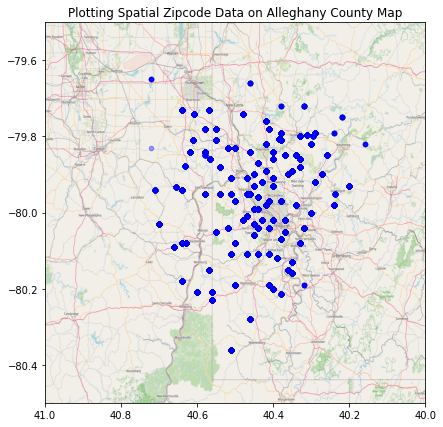

In [ ]:
dfzip=pd.read_pickle("./cleanData_geocode_zip.pkl")

mapi=plt.imread('map.png')
BBox = ((41,   40,      
         -80.5, -79.5))

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dfzip['lat-zip'],dfzip['lng-zip'], zorder=1, alpha= 0.2, c='b', s=20)
ax.set_title('Plotting Spatial Zipcode Data on Alleghany County Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapi, zorder=0, extent = BBox, aspect= 'equal')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d883e40-705b-4ee7-9326-895000a955f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>